# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

Задача: провести анализ данных, выполнить необоходимую доработку и установить параметры, влияющие на цену объектов.  
Научиться определять рыночную стоимость объектов недвижимости, по параметрам, которые могут быть взаимосвязаны с итоговой ценой на каждый объект. Получить информацию о времени продажи квартиры. Также подтвердить полученные значения на графиках, гистограммах с соответствующими выводами и итогами. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

План исследования: Обработка данных, группировка, дополнение нужными параметрами. Отобразить графические взаимосвязи. На основании полученных результатов определить параметры, которые влияют на стоимость объекта. Сделать выводы.


###  Шаг 1 .Откройте файл с данными и изучите общую информацию. 

In [473]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('C:\\Users\\tema-\\Downloads\\Jupyter\\Doc_csv\\real_estate_data.csv', sep='\t' )

In [474]:
df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0


Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

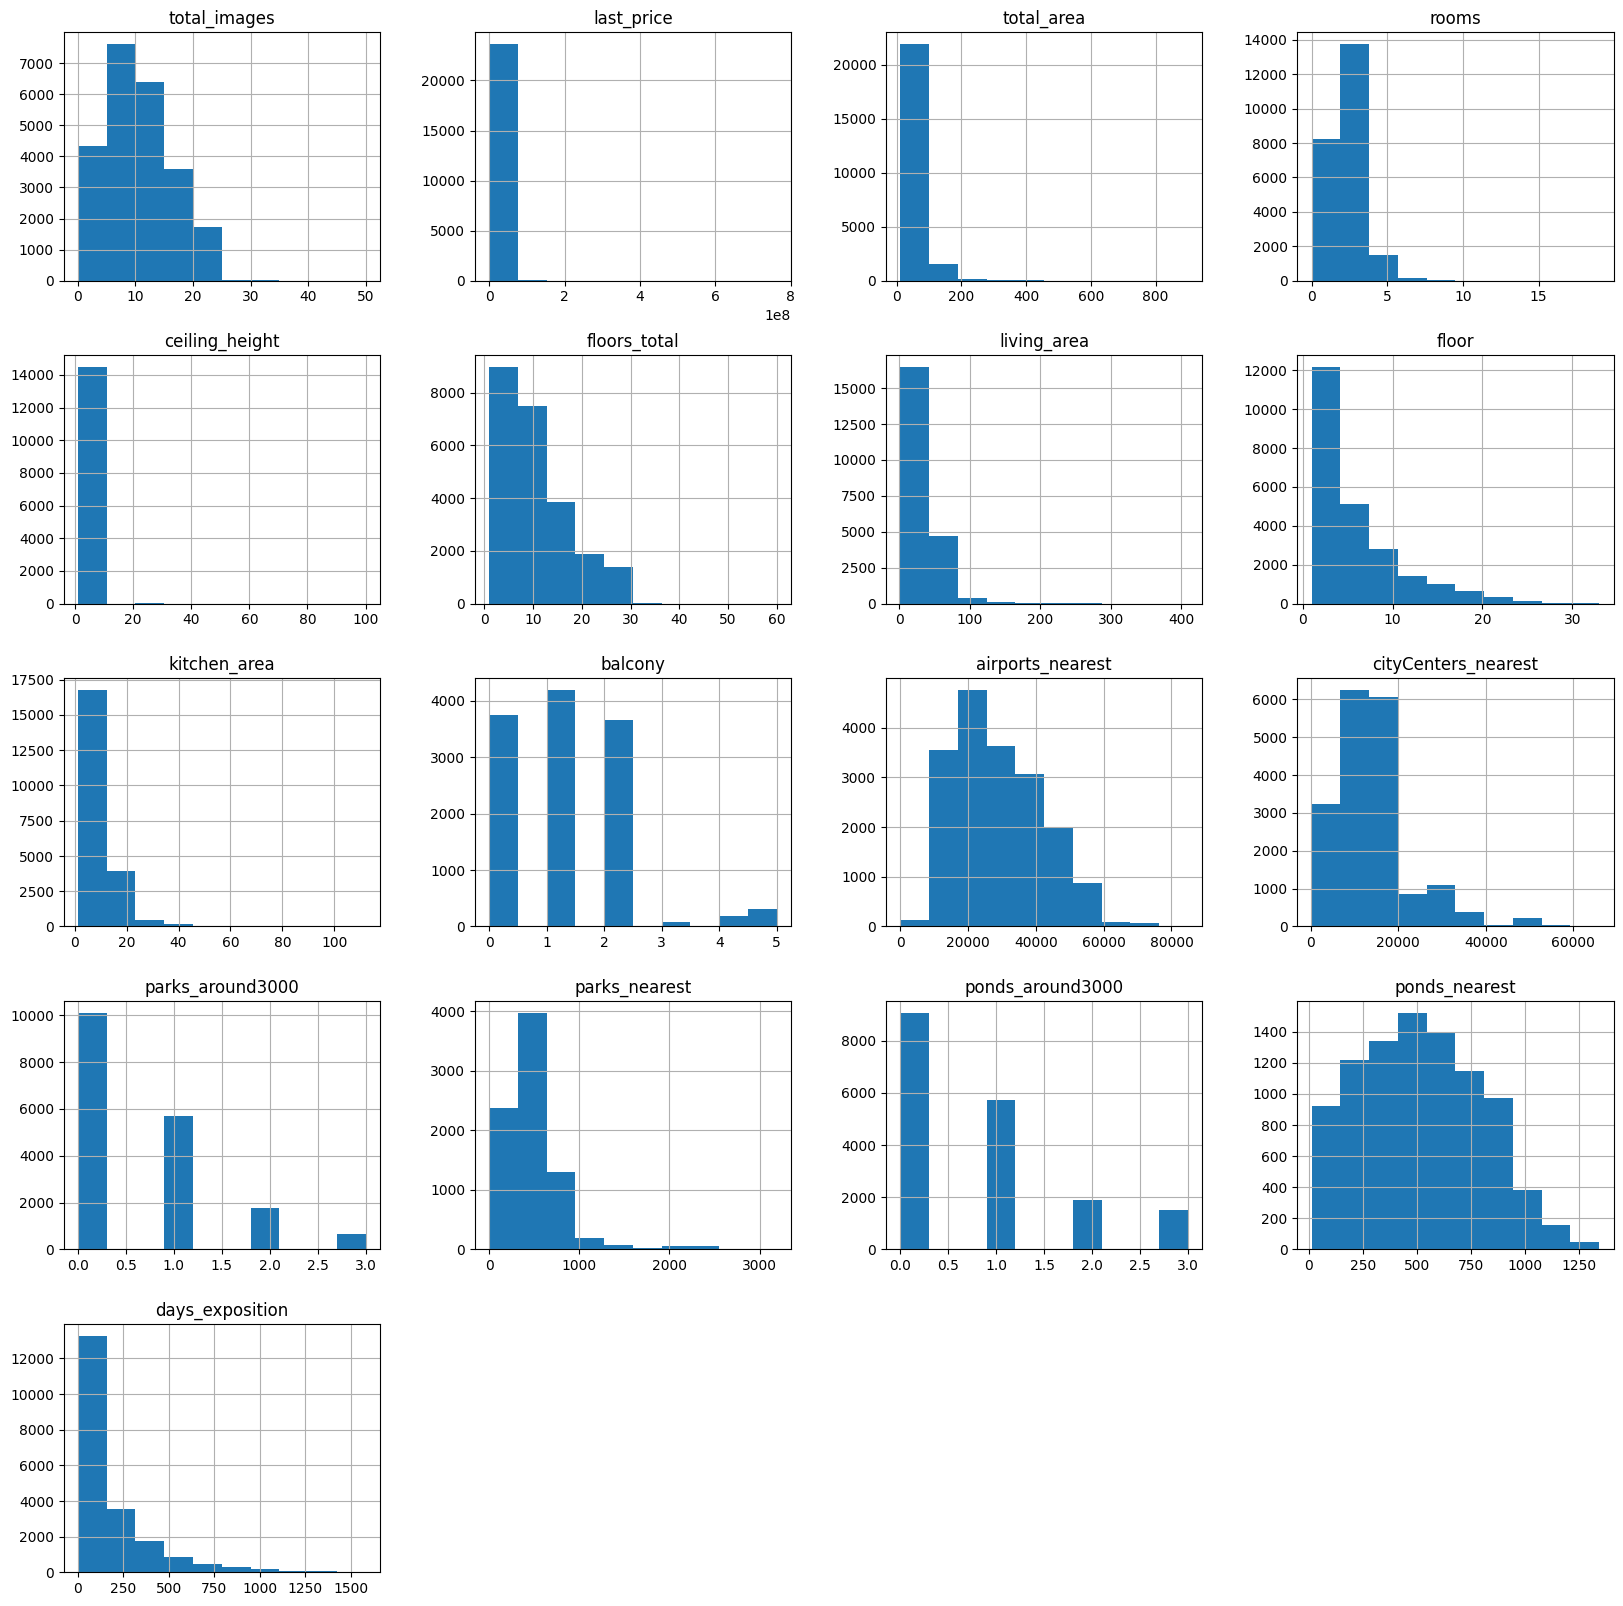

In [475]:
df.hist(figsize=(20, 20));

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [477]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Вывод на основе описательных данных:

last_price (float64 - int64): минимальная цена 12190, похоже на ошибку. Максимальная цена 763 000 000 очень большая такие значения могут влиять на среднее значение, думаю, большие данные стоит исключить.

rooms:  число комнат 0 - ошибка. Нужно проверить.

ceiling_height: минимальная высота потолков 1 метр, максимальная - 100 метров. Такие значения нужно испрвить или исключить.

floors_total (float64 - int64): max количество этажей 60 похоже на ошибку, что не характерно для Санкт-Петербурга - следует удалить.

living_area: min жилая площадь 2 м² невозможна, ошибка. 

kitchen_area: min площадь кухни 1,3 м² невозможна, ошибка. 

airports_nearest: min расстояние до аэропорта 0 м невозможно. Ошибка или нет данных и заполнили нулем. 

days_exposition (object - datetime): минимальное количество дней размещения объявления - 1, максимальное значение - 1580 дней также может повлиять на расчеты.
 
is_apartment: строка object - bool

balcony:(float64 - int64)

days_exposition:(float64 - int64)

#### Найдем общий процент пропусков данных.


In [478]:
df.isna().mean().sort_values()*100  

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
cityCenters_nearest     23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

Пропуски в стобце ceiling_height(высота потолков), минимальная высота 1м явно ошибк,а а также  более 10м. 


In [479]:
df.loc[df['ceiling_height'] >= 5, 'ceiling_height'].count()

37

In [480]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Для значений больше 20 применим деление на 10

In [481]:
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] = df['ceiling_height'] / 10

Проверим

In [482]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.729608
std          0.319850
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

Посмотрим график для наглядности

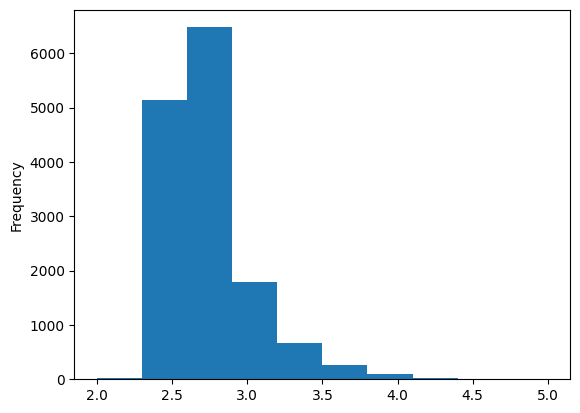

In [483]:
df['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 10, range=(2,5));

Построим диаграмму размаха высоты потолков

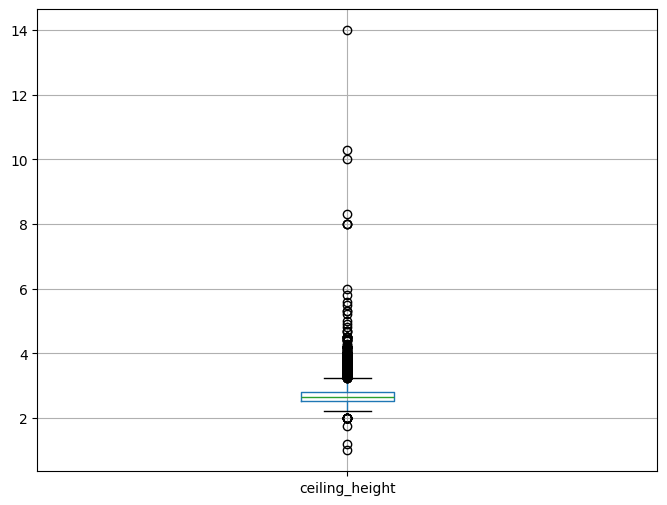

In [484]:
df.boxplot(column='ceiling_height', 
           figsize=(8, 6));

Заполним пустые строки медианой

In [485]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.65)

Оставим строки с высотой потолков от 2,5 до 5 метров

In [486]:
df = df.query('2.5 <= ceiling_height <= 5')

In [487]:
df['ceiling_height'].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.73, 2.84, 3.1 , 3.4 , 3.06, 2.72, 2.54,
       2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59, 3.6 , 2.92,
       3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12, 2.53, 2.74, 2.96,
       5.  , 2.79, 2.95, 4.06, 2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 3.38,
       3.01, 3.65, 3.9 , 3.18, 3.35, 3.57, 2.62, 2.82, 3.98, 2.63, 3.83,
       3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24,
       4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34,
       2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46,
       3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45,
       3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69, 3.31, 4.65,
       3.56, 3.51, 3.93, 3.42, 2.99, 3.49, 4.14, 2.91, 3.88, 4.25, 3.29,
       3.76, 3.69, 2.89, 3.58, 4.9 , 3.48, 3.59])

Порядок, смотрим дальше.

Можно предположить, что пропуски в столбце balcony(балконы) обусловлены отсутствием их наличия, заменим пустые строки на 0.

In [488]:
df = df.reset_index(drop=True)
df['balcony'] = df['balcony'].fillna(0)

Пропуски в столбце is_apartment вероятнее всего обусловлены другим типом квартир, поэтому заполним пустые значения как False

In [489]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Проверим итоговое наличие пропущенных значений.

In [490]:
df.isna().mean().sort_values()*100

total_images             0.000000
balcony                  0.000000
open_plan                0.000000
is_apartment             0.000000
floor                    0.000000
studio                   0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
last_price               0.000000
ceiling_height           0.000000
locality_name            0.207548
floors_total             0.364268
living_area              8.026600
kitchen_area             9.598035
days_exposition         13.418612
parks_around3000        23.236901
ponds_around3000        23.236901
cityCenters_nearest     23.241137
airports_nearest        23.338557
ponds_nearest           61.548562
parks_nearest           65.936719
dtype: float64

Пропуски остались только в ячейках, значения которых будут важными при расчетах:
- floors_total(общее количество этажей) 
- living_area (жилая площадь)  
- kitchen_area (площадь кухни) 
- days_exposition эти данные должны быть получены автоматом

и в автоматически заполняемых программой геолокации. 
Заполнить мы их не сможем, но можем учитывать их при расчете основных параметров. 

## Рассмотрим типы данных в каждом столбце:

In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23609 entries, 0 to 23608
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23609 non-null  int64  
 1   last_price            23609 non-null  float64
 2   total_area            23609 non-null  float64
 3   first_day_exposition  23609 non-null  object 
 4   rooms                 23609 non-null  int64  
 5   ceiling_height        23609 non-null  float64
 6   floors_total          23523 non-null  float64
 7   living_area           21714 non-null  float64
 8   floor                 23609 non-null  int64  
 9   is_apartment          23609 non-null  bool   
 10  studio                23609 non-null  bool   
 11  open_plan             23609 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23609 non-null  float64
 14  locality_name         23560 non-null  object 
 15  airports_nearest   

first_day_exposition(Дата время) object - datatime.

balcony:(float64 - int64)


last_price (float64 - int64)

In [492]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='mixed')

In [493]:
df['balcony'] = df['balcony'].astype('int64')
df['last_price'] = df['last_price'].astype('int64')

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23609 entries, 0 to 23608
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23609 non-null  int64         
 1   last_price            23609 non-null  int64         
 2   total_area            23609 non-null  float64       
 3   first_day_exposition  23609 non-null  datetime64[ns]
 4   rooms                 23609 non-null  int64         
 5   ceiling_height        23609 non-null  float64       
 6   floors_total          23523 non-null  float64       
 7   living_area           21714 non-null  float64       
 8   floor                 23609 non-null  int64         
 9   is_apartment          23609 non-null  bool          
 10  studio                23609 non-null  bool          
 11  open_plan             23609 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.

In [495]:
len(df['locality_name'].unique())

364

In [496]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Приведем названия к общему значению, с нужным регистром.

In [497]:
df['locality_name'] = df['locality_name'].str.lower() 
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', '')
df['locality_name'] = df['locality_name'].str.replace('посёлок городского типа ', '')
df['locality_name'] = df['locality_name'].str.replace('поселок ', '')
df['locality_name'] = df['locality_name'].str.replace('посёлок ', '')
df['locality_name'] = df['locality_name'].str.replace('село ', '')
df['locality_name'] = df['locality_name'].str.replace('городской посёлок ', '')
df['locality_name'] = df['locality_name'].str.replace('коттеджный поселок ', '')
df['locality_name'] = df['locality_name'].str.replace('городской поселок ', '')
len(df['locality_name'].unique())

334

Поиск аномальных значений

In [498]:
df['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37], dtype=int64)

Стоимости с нулевым значением нет

In [499]:
df.query('last_price == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Даты с нулевым значением нет

In [500]:
df['first_day_exposition'].unique()

<DatetimeArray>
['2019-03-07 00:00:00', '2018-12-04 00:00:00', '2015-08-20 00:00:00',
 '2015-07-24 00:00:00', '2018-06-19 00:00:00', '2018-09-10 00:00:00',
 '2017-11-02 00:00:00', '2019-04-18 00:00:00', '2018-05-23 00:00:00',
 '2017-02-26 00:00:00',
 ...
 '2015-11-15 00:00:00', '2015-04-21 00:00:00', '2015-04-04 00:00:00',
 '2015-01-06 00:00:00', '2015-06-13 00:00:00', '2016-10-30 00:00:00',
 '2015-03-27 00:00:00', '2014-12-29 00:00:00', '2016-09-12 00:00:00',
 '2015-07-19 00:00:00']
Length: 1491, dtype: datetime64[ns]

Есть количество комнат с нулевым значением 

In [501]:
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

Удалим эти строки

In [502]:
df = df[df.rooms > 0]

Почему то в некоторой неджвижимости возможна высота потолков выше 10м, это не позволит выполнить корректные вычисления, ограничим наш список и уберем такие строки и оставим один знак после запятой.

в Санкт-Петербурге нету зданий и сооружений выше 30 этажей, поэтому удалим строки с такими значениями

In [503]:
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52.])

In [504]:
df = df[df.floors_total < 30]

In [505]:
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       21.,  1., 29.])

Количество этажей в норме.

Значения жилой площади в порядке

In [506]:
df['living_area'].unique()

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

Поиск дубликатов

In [507]:
df.duplicated().sum()

0

Дубликатов в данных нет

Переименуем некорректные названия столбцов

In [508]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})

Получаем финальный обработанный датасет для исследования состоящий из 23301 строк

In [509]:
df.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.00,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.00,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.30,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.00,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23296,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,13.83,0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23297,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,8.50,0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23298,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,NaN,0,рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23299,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,23.30,2,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23301 entries, 0 to 23608
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23301 non-null  int64         
 1   last_price            23301 non-null  int64         
 2   total_area            23301 non-null  float64       
 3   first_day_exposition  23301 non-null  datetime64[ns]
 4   rooms                 23301 non-null  int64         
 5   ceiling_height        23301 non-null  float64       
 6   floors_total          23301 non-null  float64       
 7   living_area           21450 non-null  float64       
 8   floor                 23301 non-null  int64         
 9   is_apartment          23301 non-null  bool          
 10  studio                23301 non-null  bool          
 11  open_plan             23301 non-null  bool          
 12  kitchen_area          21276 non-null  float64       
 13  balcony              

### Проведем исследовательский анализ данных

Добавим столбец с ценой за 1м² и oкруглим полученную цену до копеек

In [511]:
df['price_one__meter'] = df['last_price'] / df['total_area']
df['price_one__meter'] = df['price_one__meter'].round(2)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one__meter
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


Добавим столбец с днем недели, месяцем и годом публикации объявления

In [512]:
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_year'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one__meter,exposition_weekday,exposition_month,exposition_year
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018


Функция для категоризации этажности в доме

In [513]:
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

Добавляем столбец с категорией этажа квартиры

In [514]:
df['floor_category'] = df.apply(floor_category, axis=1)

In [515]:
df['floor_category'].value_counts()

floor_category
другой       17117
последний     3303
первый        2881
Name: count, dtype: int64

Добавим столбец city_centers_nearest_km

In [516]:
df['city_centers_nearest_km'] = round(df['city_centers_nearest'] / 1000)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one__meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


### Изучим интересующие параметры

Общая площадь

In [517]:
df['total_area'].describe().T

count    23301.000000
mean        60.594179
std         35.521275
min         12.000000
25%         40.200000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

 Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов

In [518]:
q1 = df['total_area'].quantile(.25)
q3 = df['total_area'].quantile(.75) 
iqr = q3 - q1 

Построим гистограмму площади

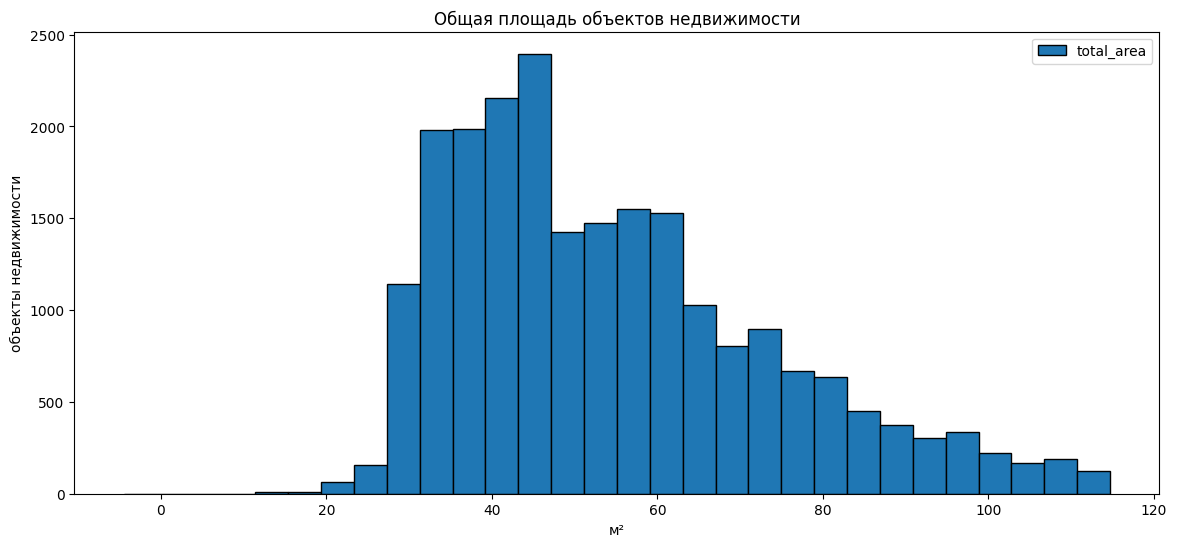

In [519]:
df['total_area'].plot( title='Общая площадь объектов недвижимости', 
                      kind='hist',
                      bins=30, range=((q1 - 1.5 * iqr),
                                      (q3 + 1.5 * iqr)),
                      figsize=(14, 6),
                      ec='black',
                      legend=True,
                      xlabel='м²',
                      ylabel='объекты недвижимости');

Рассматриваемый диапазон до примерно 118 м², исключая выбросы. Большая часть объектов недвижимости имеют площадь от 30 до 65 м². Самый распространенный вариант - около 45 - 50м². Площадь объектов более 100 м² и меньше 30 м² встречается редко. Среднее значение - 60 м² и медиана 52 м² сдвинуты в сторону больших значений. Их не так много, но график получается растянутым.

Жилая площадь

In [520]:
df['living_area'].describe()

count    21450.000000
mean        34.597133
std         22.056948
min          2.000000
25%         18.700000
50%         30.000000
75%         42.500000
max        409.700000
Name: living_area, dtype: float64

In [521]:
q1 = df['living_area'].quantile(.25)
q3 = df['living_area'].quantile(.75) 
iqr = q3 - q1 

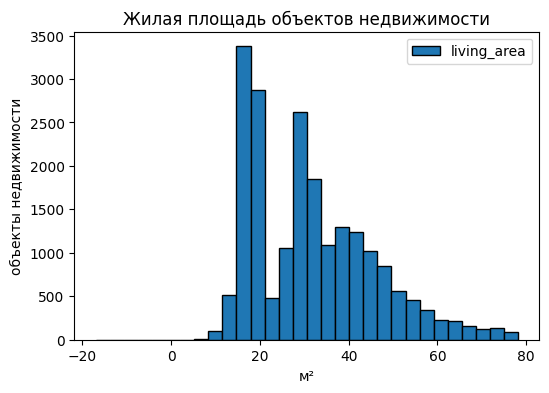

In [522]:
df['living_area'].plot( title='Жилая площадь объектов недвижимости', 
                      kind='hist',
                      bins=30, range=((q1 - 1.5 * iqr),
                                      (q3 + 1.5 * iqr)),
                      figsize=(6, 4),
                      ec='black',
                      legend=True,
                      xlabel='м²',
                      ylabel='объекты недвижимости');

Большая часть объектов недвижимости имеют жилую площадь от 15 до 35 м². Самый распространенный вариант - около 15 м². Жилая площадь объектов более 60 м² встречается редко. С площадью меньше 15 м² также редкость. Среднее значение - 34 м², медиана 30 м². У графика также наблюдается "хвост" из-за редких, но больших значений.

Площадь кухни объектов недвижимости

In [523]:
df['kitchen_area'].describe()

count    21276.000000
mean        10.562479
std          5.895688
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [524]:
q1 = df['kitchen_area'].quantile(.25)
q3 = df['kitchen_area'].quantile(.75) 
iqr = q3 - q1 

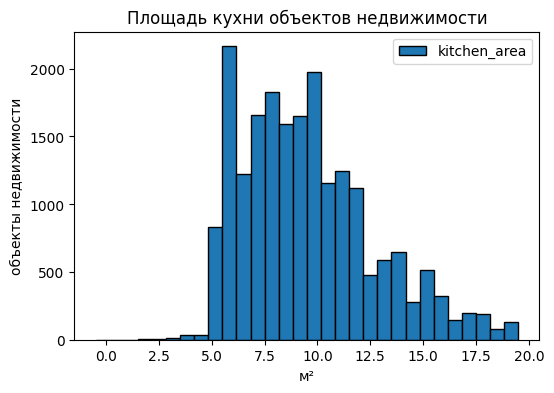

In [525]:
df['kitchen_area'].plot( title='Площадь кухни объектов недвижимости', 
                      kind='hist',
                      bins=30, range=((q1 - 1.5 * iqr),
                                      (q3 + 1.5 * iqr)),
                      figsize=(6, 4),
                      ec='black',
                      legend=True,
                      xlabel='м²',
                      ylabel='объекты недвижимости');

Рассматриваемый диапазон до примерно 19 м², исключая выбросы. Большая часть объектов недвижимости имеют площадь кухни от 5,5 до 12 м². Самый распространенный вариант - около 5,5 м². Площадь кухни более 13 м² встречается редко. Площадь кухни менее 5 м² также редкость. Среднее значение - 10,5 м², медиана 9,1 м². У графика также наблюдается небольшой "хвост" из-за редких, но больших значений

Цена объекта недвижимости

In [526]:
df['last_price'].describe()

count    2.330100e+04
mean     6.558479e+06
std      1.087582e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [527]:
q1 = df['last_price'].quantile(.25)
q3 = df['last_price'].quantile(.75) 
iqr = q3 - q1 

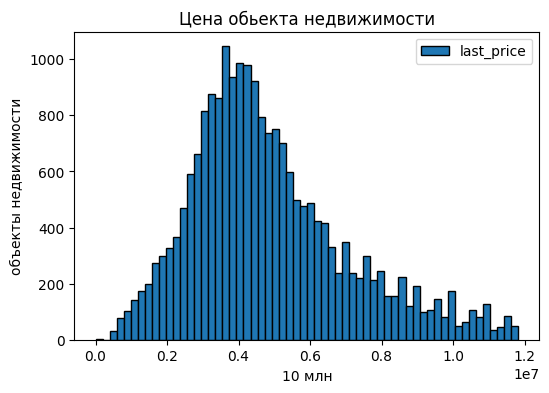

In [528]:
df['last_price'].plot( title='Цена обьекта недвижимости', 
                      kind='hist',
                      bins=60, range=(0,(q3 + 1.5 * iqr)),
                      figsize=(6, 4),
                      ec='black',
                      legend=True,
                      xlabel='10 млн',
                      ylabel='объекты недвижимости');

Рассматриваем диапазон до примерно 12 млн руб., исключая выбросы. Большинство объектов недвижимости имеют цену в пределах от 3 до 5 млн. руб.. Самый распространенный вариант - около 3.5 млн.руб.. Вариантов с ценой более 10 млн немного. Среднее значение - 6,5 млн, медиана 4,6 млн. У графика также наблюдается небольшой "хвост" из-за редких, но больших значений.

Количество комнат

In [529]:
df['rooms'].describe()

count    23301.000000
mean         2.088451
std          1.066676
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [530]:
q1 = df['rooms'].quantile(.25)
q3 = df['rooms'].quantile(.75) 
iqr = q3 - q1 

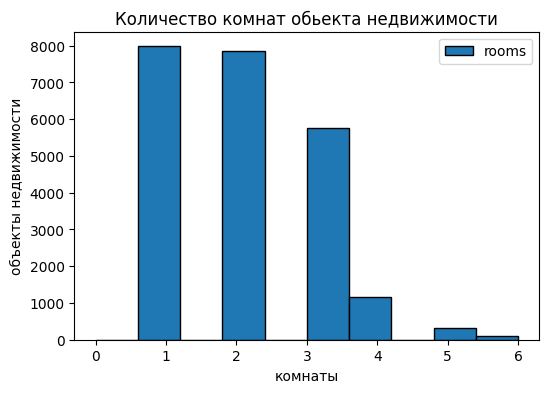

In [531]:
df['rooms'].plot( title='Количество комнат обьекта недвижимости', 
                      kind='hist',
                      bins=10, range=(0,(q3 + 1.5 * iqr)),
                      figsize=(6, 4),
                      ec='black',
                      legend=True,
                      xlabel='комнаты',
                      ylabel='объекты недвижимости');

Рассматриваемый диапазон от 1 до 5 комнат, исключая некорректные значения (0 комнат) и выбросы. Большая часть объектов недвижимости имеют 1 или 2 комнаты, чуть меньше - 3 комнаты. Объектов, с кол-вом комнат 4-5 относительно немного. Среднее и медиана 2 комнаты точны. Крайне редкие значения от 6  не оказывают существенного влияния на среднее значение.*

Высота потолков

In [532]:
df['ceiling_height'].describe()

count    23301.000000
mean         2.697253
std          0.216003
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

In [533]:
q1 = df['ceiling_height'].quantile(.25)
q3 = df['ceiling_height'].quantile(.75) 
iqr = q3 - q1 

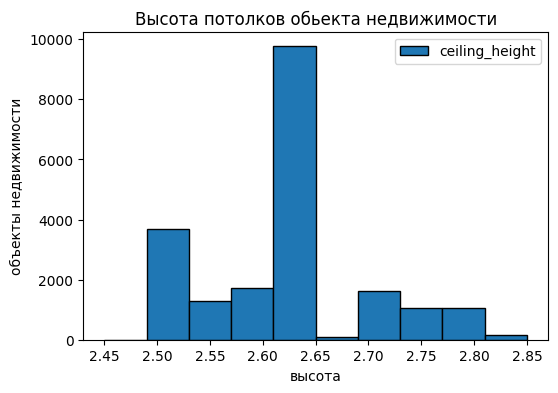

In [534]:
df['ceiling_height'].plot( title='Высота потолков обьекта недвижимости', 
                      kind='hist',
                      bins=10, range=((q1 - 1.5 * iqr),(q3 + 1.5 * iqr)),
                      figsize=(6, 4),
                      ec='black',
                      legend=True,
                      xlabel='высота',
                      ylabel='объекты недвижимости');

Большинство объектов недвижимости имеют высоту потолков 2,5 м и 3,2 м. 
Реже представлены варианты от 2,7м до 2,85 м. Среднее 2,7 м и медиана 2,65 точны.

Этаж квартиры

In [535]:
df['floor'].describe()

count    23301.000000
mean         5.845157
std          4.831714
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

In [536]:
q1 = df['floor'].quantile(.25)
q3 = df['floor'].quantile(.75) 
iqr = q3 - q1 

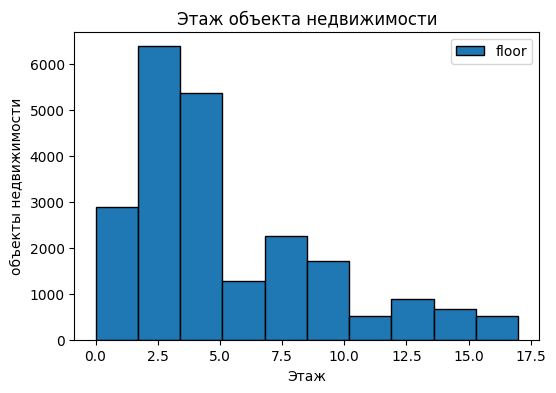

In [537]:
df['floor'].plot( title='Этаж объекта недвижимости', 
                      kind='hist',
                      bins=10, range=(0,(q3 + 1.5 * iqr)),
                      figsize=(6, 4),
                      ec='black',
                      legend=True,
                      xlabel='Этаж',
                      ylabel='объекты недвижимости');

Рассматриваемый диапазон с 1 по 15 этаж, исключая некорректные значения и выбросы. Большинство объектов недвижимости расположены с 1 по 4 этаж. Реже представлены варианты с 4 по 7. Среднее 5 этаж и медиана 4 этаж.

Тип этажа квартиры («первый», «последний», «другой»)

In [538]:
df['floor_category'].value_counts()

floor_category
другой       17117
последний     3303
первый        2881
Name: count, dtype: int64

<Axes: xlabel='floor_category'>

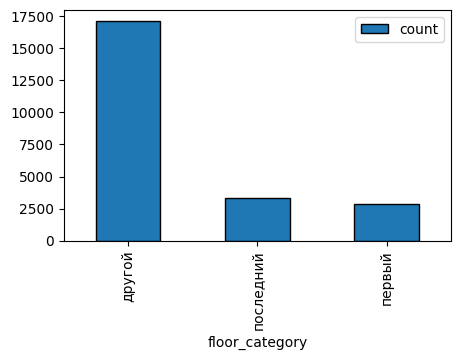

In [539]:
df['floor_category'].value_counts().plot(figsize=(5, 3),kind='bar', ec='black', legend=True)

Видно, что объекты недвижимости, расположенные на первом и последним этажах имеют примерно одинаковые значения и их доля не столь велика. В основном объекты расположены на этажах между первым и последним.

Общее количество этажей в доме

In [540]:
df['floors_total'].describe()

count    23301.000000
mean        10.600790
std          6.510357
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

In [541]:
q1 = df['floors_total'].quantile(.25)
q3 = df['floors_total'].quantile(.75) 
iqr = q3 - q1 

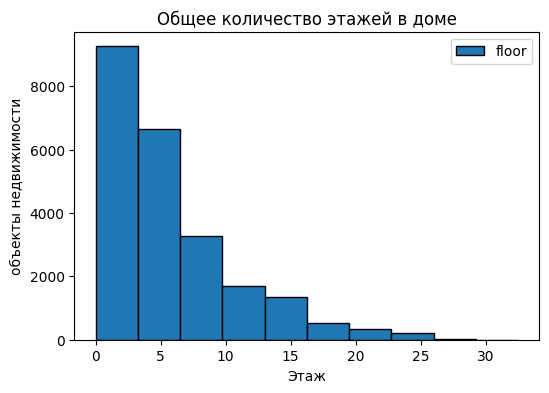

In [542]:
df['floor'].plot( title='Общее количество этажей в доме', 
                      kind='hist',
                      bins=10, range=(0,(q3 + 1.5 * iqr)),
                      figsize=(6, 4),
                      ec='black',
                      legend=True,
                      xlabel='Этаж',
                      ylabel='объекты недвижимости');

Рассматриваемый диапазон с 1 по 25 этаж, исключая некорректные значения и выбросы. Большинство объектов недвижимости - это 5-ти , 9-ти этажки. Остальные варианты представлены реже. Среднее 10 этаж и медиана 9 этаж.

Расстояние до центра города в метрах

In [543]:
df['city_centers_nearest'].describe()

count    17901.000000
mean     14178.718451
std       8632.729883
min        181.000000
25%       9217.000000
50%      13073.000000
75%      16268.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [544]:
q1 = df['city_centers_nearest'].quantile(.25)
q3 = df['city_centers_nearest'].quantile(.75) 
iqr = q3 - q1 

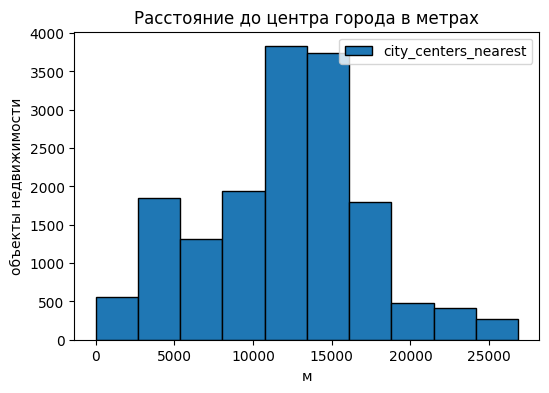

In [545]:
df['city_centers_nearest'].plot( title='Расстояние до центра города в метрах', 
                      kind='hist',
                      bins=10, range=(0,(q3 + 1.5 * iqr)),
                      figsize=(6, 4),
                      ec='black',
                      legend=True,
                      xlabel='м',
                      ylabel='объекты недвижимости');

Рассматриваемый диапазон с 1000 до 22000 м, исключая некорректные значения и выбросы. Большинство объектов недвижимости расположены на удалении 13-15 км от центра. Остальные варианты представлены реже. Среднее 14,1 км и медиана 13 км.

Расстояние до ближайшего аэропорта

Уберем значения равные 0

In [546]:
df = df.query('airports_nearest != 0')

In [547]:
df['airports_nearest'].describe()

count    17877.000000
mean     28837.454495
std      12624.925295
min       6450.000000
25%      18585.000000
50%      26781.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [548]:
q1 = df['airports_nearest'].quantile(.25)
q3 = df['airports_nearest'].quantile(.75) 
iqr = q3 - q1 

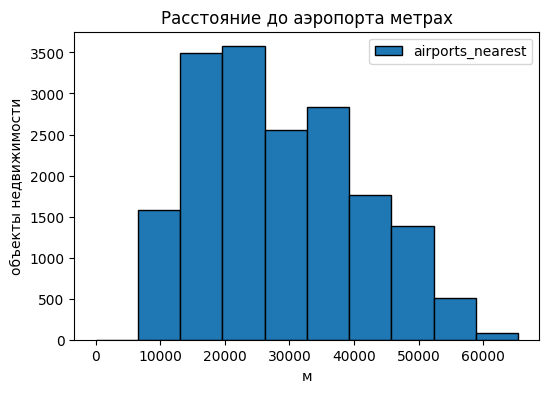

In [549]:
df['airports_nearest'].plot( title='Расстояние до аэропорта метрах', 
                      kind='hist',
                      bins=10, range=(0,(q3 + 1.5 * iqr)),
                      figsize=(6, 4),
                      ec='black',
                      legend=True,
                      xlabel='м',
                      ylabel='объекты недвижимости');

Рассматриваемый диапазон с 5000 до 60000 м. Большинство объектов недвижимости расположены на удалении от аэропорта на расстоянии 15-25 км. Ближайший к аэропорту объект на расстоянии 6,9 км. Среднее 28,8 км и медиана 26,7 км.

Расстояние до ближайшего парка в метрах

In [550]:
df = df.query('parks_nearest != 0')
df['parks_nearest'].describe()

count    7977.00000
mean      490.24884
std       342.04166
min         1.00000
25%       287.00000
50%       453.00000
75%       612.00000
max      3190.00000
Name: parks_nearest, dtype: float64

In [551]:
q1 = df['parks_nearest'].quantile(.25)
q3 = df['parks_nearest'].quantile(.75) 
iqr = q3 - q1 

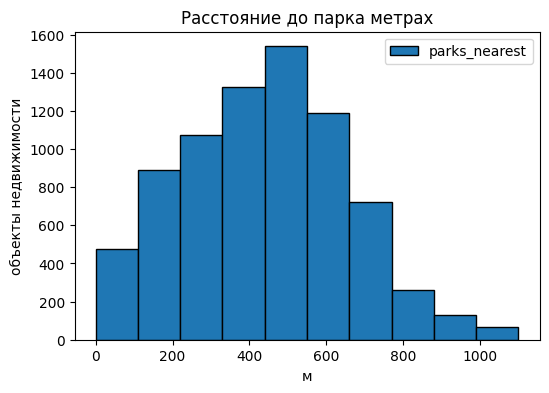

In [552]:
df['parks_nearest'].plot( title='Расстояние до парка метрах', 
                      kind='hist',
                      bins=10, range=(0,(q3 + 1.5 * iqr)),
                      figsize=(6, 4),
                      ec='black',
                      legend=True,
                      xlabel='м',
                      ylabel='объекты недвижимости');

Рассматриваемый диапазон с 0 до 1100 м. Большинство объектов недвижимости расположены на удалении от ближайшего парка на расстоянии 400-600м. Ближайшие к парку объекты на расстоянии 10м. Среднее 475м и медиана 447м.

День и месяц публикации объявления

In [553]:
df['exposition_weekday'].describe()

count    23300.000000
mean         2.566652
std          1.789175
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: exposition_weekday, dtype: float64

Посмотрим кол-во объявлений по каждому дню недели

In [554]:
df['exposition_weekday'].value_counts().sort_values()

exposition_weekday
6    1665
5    1907
0    3561
2    3909
4    3920
1    4117
3    4221
Name: count, dtype: int64

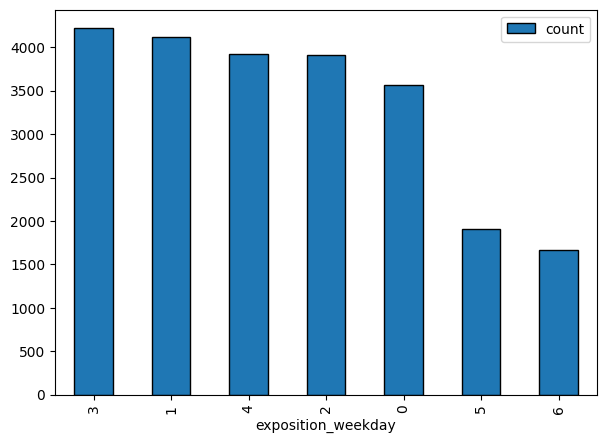

In [555]:
df['exposition_weekday'].value_counts().plot(figsize=(7, 5),kind='bar', ec='black', legend=True);

По графику видно, что чаще всего объявления публиковали в будние дни в середине недели. Реже в выходные дни

Месяц публикации объявления

In [556]:
df['exposition_month'].value_counts().sort_values()

exposition_month
5     1250
1     1477
12    1620
7     1668
8     1710
6     1739
9     1940
10    2083
11    2319
4     2336
3     2551
2     2607
Name: count, dtype: int64

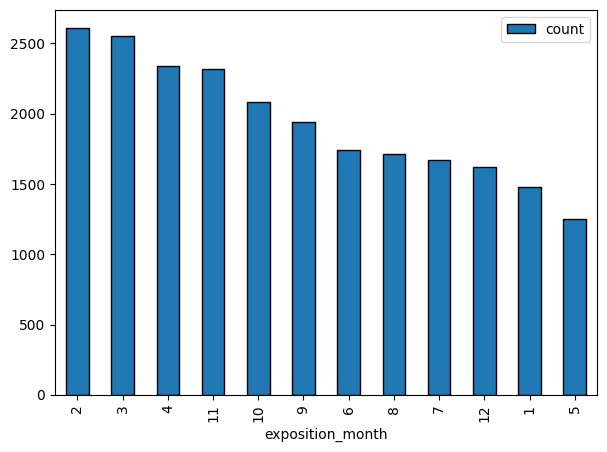

In [557]:
df['exposition_month'].value_counts().plot(figsize=(7, 5),kind='bar', ec='black', legend=True);

По графику видно, что чаще всего объявления публиковали в марте и феврале. Наименьшие показатели в январе и мае. Можно предположить, что это из-за большого кол-ва отпусков в эти месяцы.

### Вывод: 
Мы получили представление о типичном объекте недвижимости из исходных данных: квартира с 1 или 2 комнатами, 5-ти или 9-ти этажка (с квартирой с 1 по 4 этаж), общей площадью около 45 м², площадью кухни около 5,5 м², с высотой потолков 2,6 м, стоимостью около 3.5 млн.руб, расположенной на удалении от центра на расстоянии 11000-16000 метров, от аэропорта на расстоянии 15000-25000 м, до ближайшего парка около 500 метров

Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

Проанализируем время продажи квартиры.

In [558]:
q1 = df['days_exposition'].quantile(.25) 
q3 = df['days_exposition'].quantile(.75) 
iqr = q3 - q1 

<Axes: title={'center': 'Время продажи квартиры'}, xlabel='дни', ylabel='объекты недвижимости'>

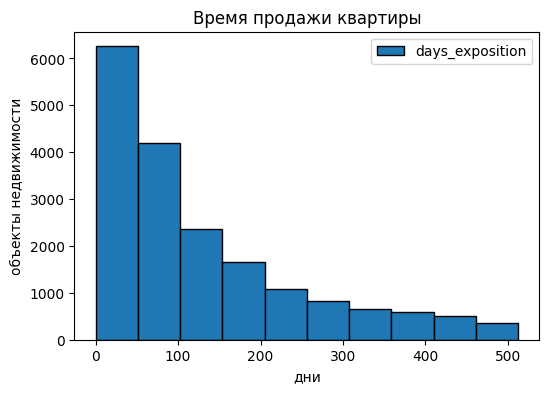

In [559]:
df['days_exposition'].plot( title='Время продажи квартиры', 
                      kind='hist',
                      bins=10, range=(0,(q3 + 1.5 * iqr)),
                      figsize=(6, 4),
                      ec='black',
                      legend=True,
                      xlabel='дни',
                      ylabel='объекты недвижимости')

На графике видны пики около 50-60 дней, но при таком длинном "хвосте" из данных делать выводы не уместно. Изменим масштаб - изменим период до 100 дней.

<Axes: title={'center': 'Время продажи квартиры'}, xlabel='дни', ylabel='объекты недвижимости'>

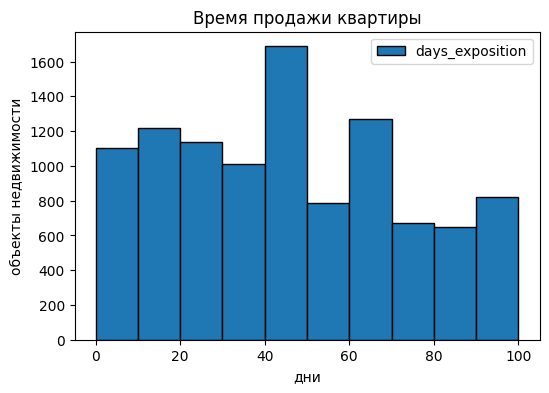

In [560]:
df['days_exposition'].plot( title='Время продажи квартиры', 
                      kind='hist',
                      bins=10, range=(0,100),
                      figsize=(6, 4),
                      ec='black',
                      legend=True,
                      xlabel='дни',
                      ylabel='объекты недвижимости')

Судя по графику, чаще всего квартиры продают за 45 и 60 дней. Но тут важно учесть, что возможно квартира не продана, а просто закрылось объявление в связи с истекшим сроком публикации. Также объявление может остаться на сайте, даже если объект недвижимости уже фактически продан, просто забыли снять объявление. В этом случае если пользователь не потдвердит актуальность объявления, оно может быть автоматически удалено.

Теперь посмотрим на среднее и медиану

In [561]:
df['days_exposition'].describe()

count    20162.000000
mean       181.590120
std        220.266776
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи объекта недвижимости 192 дня, медианное - 107 дней. Максимальное значение - 1580 дней. Смотря на график, можно увидеть длиный "хвост". Больших значений достаточно много. Среднее значение в 2 раза больше медианного. Стандартное отклонение превышает среднее значение - это говорит о большом кол-ве выбросов. Чтобы посмотреть на всю эту красоту нужно построить диаграмму размаха

<Axes: >

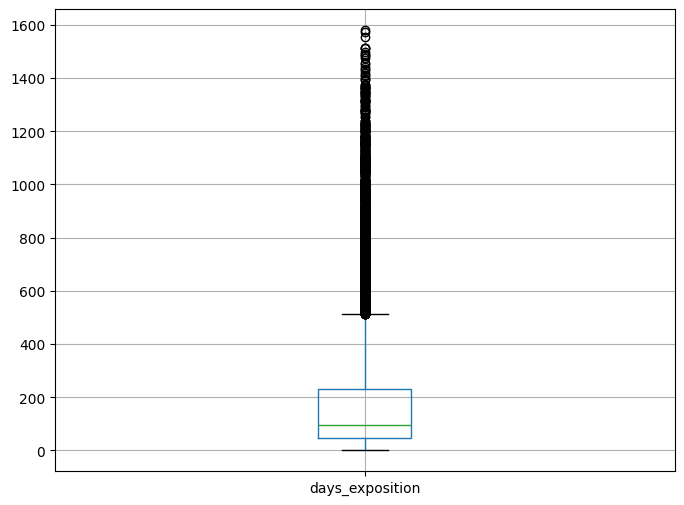

In [562]:
df.boxplot(column='days_exposition', 
           figsize=(8, 6))

Все, что выше этого значения - это выбросы

In [563]:
vubros = q3 + 1.5 * iqr
vubros

512.5

Обновим датафрейм без выбросов

In [564]:
df_update = df.query('days_exposition < 510')
len(df_update)

18498

Убрали из датафрейма 4834 строк, которые содержали выбросы по времени продажи объекта. Оценка времени продажи: быстрая продажа - до 45 дней, нормальная продажа - от 45 до 231 дней, долгая продажа - от 231 до 510 дней. Продажи после 510 дней - выбросы

Определим  и проверим факторы которые больше всего влияют на общую (полную) стоимость объекта

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Зависимость общей площади от стоимости квартиры

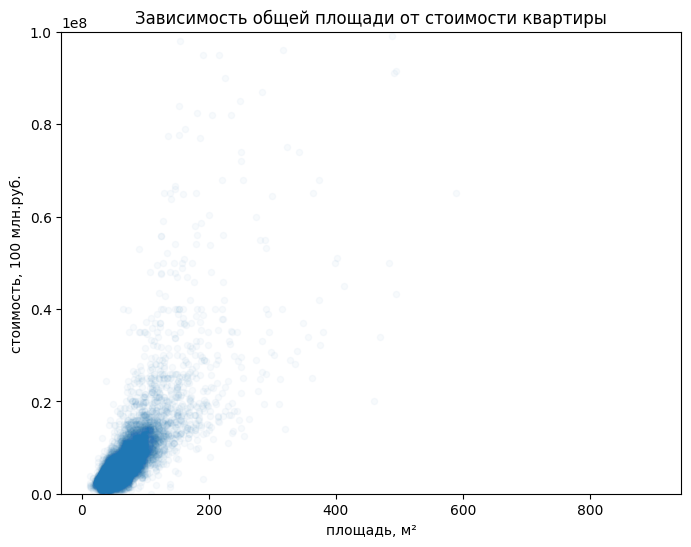

In [565]:
df_update.plot(x='total_area', 
        y ='last_price', 
        kind ='scatter', 
        figsize=(8, 6), 
        legend=True, 
        alpha = 0.03,
        title='Зависимость общей площади от стоимости квартиры',
        xlabel='площадь, м²',
        ylabel='стоимость, 100 млн.руб.',
        ylim=(0, 100000000));


Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью до 150 кв.м. Зависимость прямопропорциональная - чем больше площадь квартиры, тем выше цена.

Зависимость жилой площади от стоимости квартиры

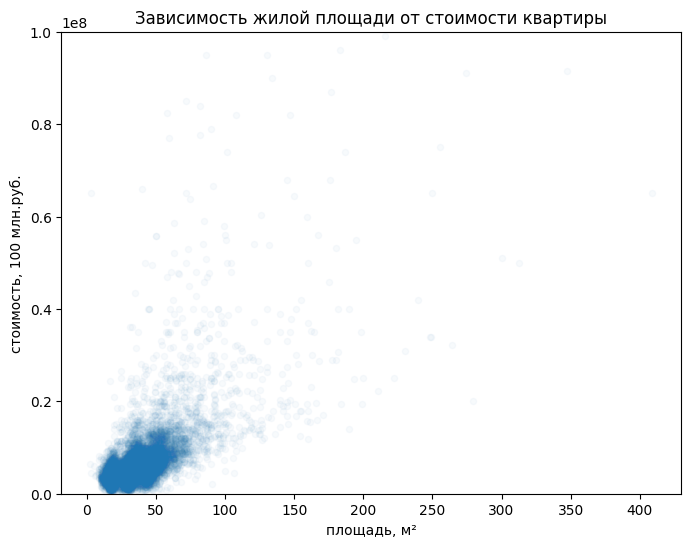

In [566]:
df_update.plot(x='living_area', 
        y ='last_price', 
        kind ='scatter', 
        figsize=(8, 6), 
        legend=True, 
        alpha = 0.03,
        title='Зависимость жилой площади от стоимости квартиры',
        xlabel='площадь, м²',
        ylabel='стоимость, 100 млн.руб.',
        ylim=(0, 100000000));

Зависимость площади кухни от стоимости квартиры

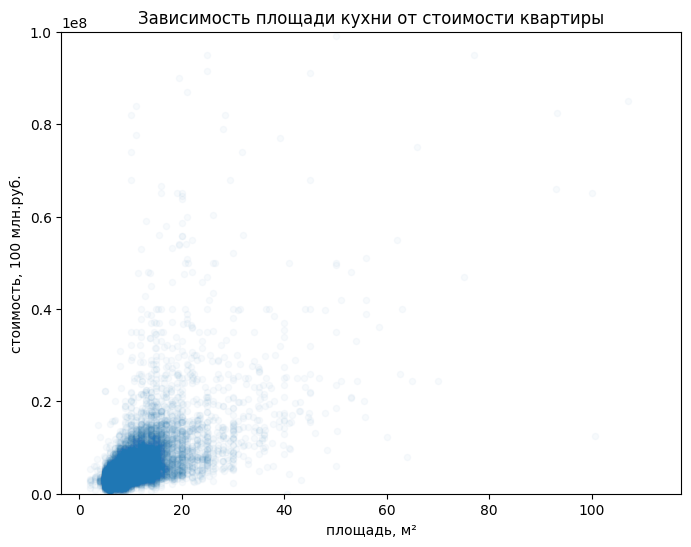

In [567]:
df_update.plot(x='kitchen_area', 
        y ='last_price', 
        kind ='scatter', 
        figsize=(8, 6), 
        legend=True, 
        alpha = 0.03,
        title='Зависимость площади кухни от стоимости квартиры',
        xlabel='площадь, м²',
        ylabel='стоимость, 100 млн.руб.',
        ylim=(0, 100000000));

Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью кухни до 18 м². Зависимость прямопропорциональная - чем больше площадь кухни, тем выше ее стоимость.

Зависимость кол-ва комнат от стоимости квартиры

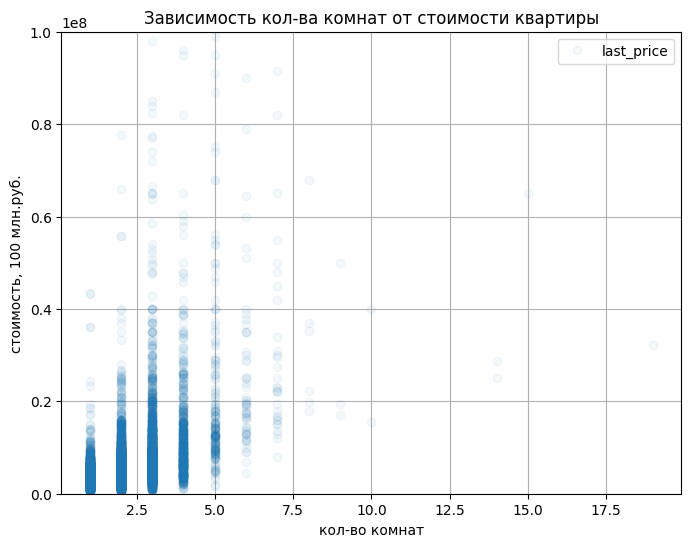

In [568]:
df_update.plot(x='rooms', 
        y ='last_price',  
        style='o',
        figsize=(8, 6), 
        grid=True,
        legend=True, 
        alpha = 0.05,
        title='Зависимость кол-ва комнат от стоимости квартиры',
        xlabel='кол-во комнат',
        ylabel='стоимость, 100 млн.руб.',
        ylim=(0, 100000000));

Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб и кол-вом комнат от 1 до 4. Для этого диапазона: с учеличение числа комнат до 3 комнат стоимость квартир растет, от 3 до 4 - цена примерно одинаковая, для 5 комнат стоимость снижается. Это можно объяснить тем, что в старом фонде есть 5-ти комнатные квартиры с маленькой площадью комнат.

Зависимость дня, месяца, года размещения объявления от стоимости квартиры

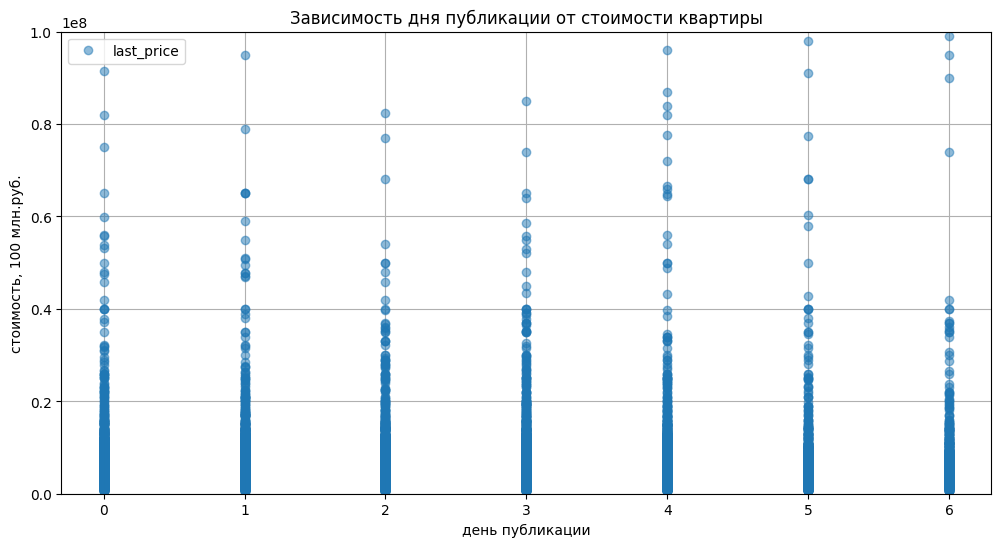

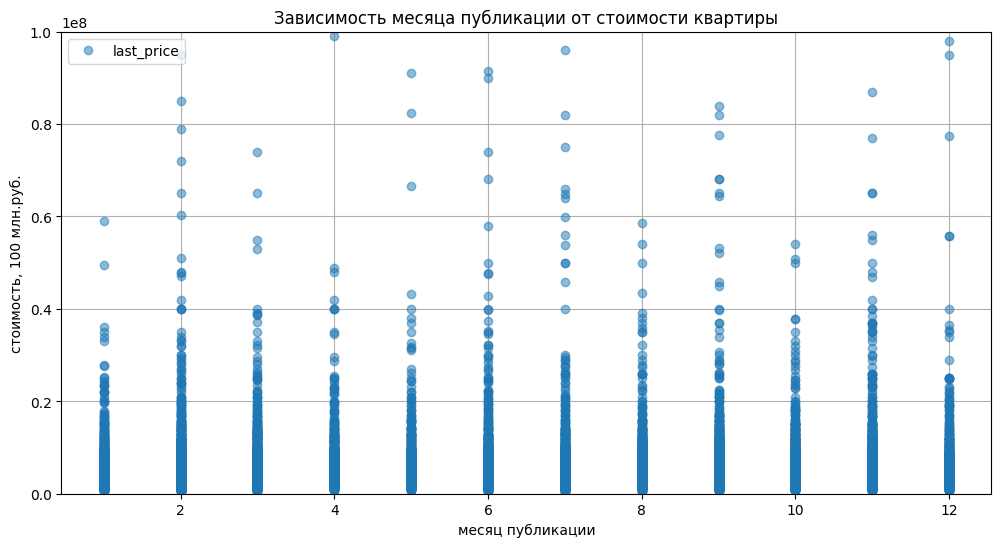

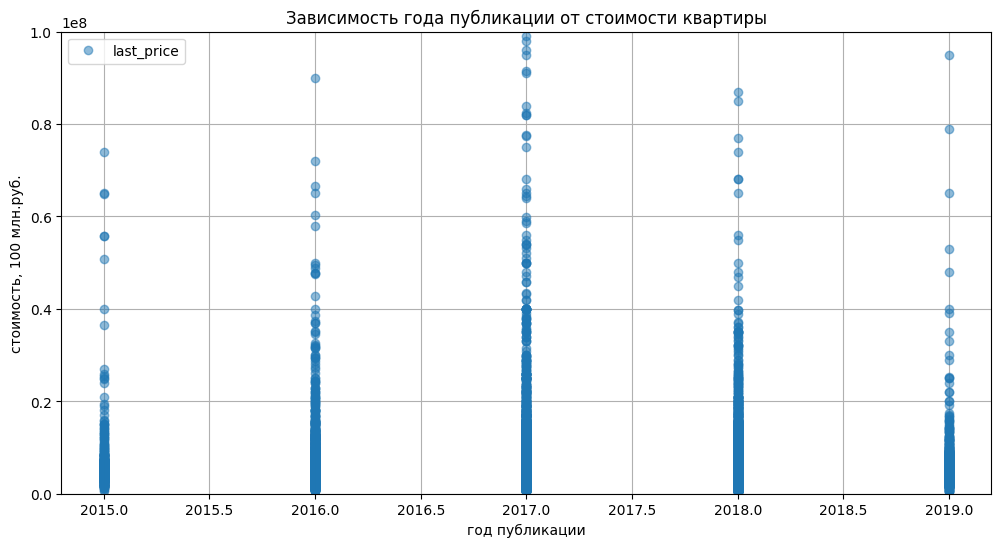

In [569]:
df_update.plot(x='exposition_weekday', 
        y ='last_price', 
        style='o',
        figsize=(12, 6), 
        grid=True,
        legend=True, 
        alpha = 0.5,
        title='Зависимость дня публикации от стоимости квартиры',
        xlabel='день публикации',
        ylabel='стоимость, 100 млн.руб.',
        ylim=(0, 100000000))

df_update.plot(x='exposition_month', 
        y ='last_price', 
        style='o',
        figsize=(12, 6), 
        grid=True,
        legend=True, 
        alpha = 0.5,
        title='Зависимость месяца публикации от стоимости квартиры',
        xlabel='месяц публикации',
        ylabel='стоимость, 100 млн.руб.',
        ylim=(0, 100000000))

df_update.plot(x='exposition_year', 
        y ='last_price', 
        style='o',
        figsize=(12, 6), 
        grid=True,
        legend=True, 
        alpha = 0.5,
        title='Зависимость года публикации от стоимости квартиры',
        xlabel='год публикации',
        ylabel='стоимость, 100 млн.руб.',
        ylim=(0, 100000000));


Зависимоть между датой размещения объявления (день недели, месяц, год) и стоимостью квартир отсутствует. 

Чтобы посмотреть связь между этажом и стоимостью квартиры построим сводную таблицу и визуализируем результаты на графике.

,floor_category,mean,count,median
0,другой,6.250116e+06,13759,4680000.0
1,первый,4.465498e+06,2210,3800000.0
2,последний,6.824728e+06,2529,4200000.0


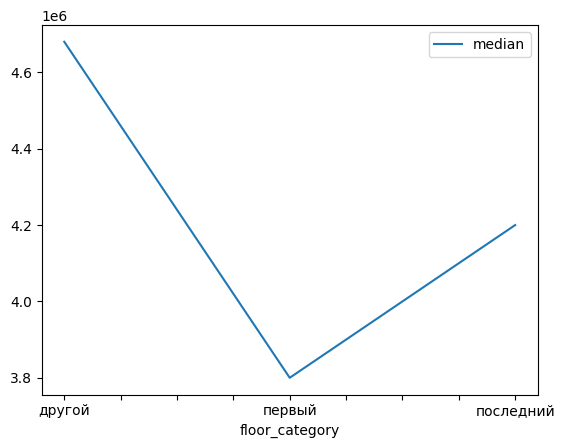

In [570]:
pivot_table_floor_category = df_update.pivot_table(index = 'floor_category', 
                                            values = 'last_price', 
                                            aggfunc = ['mean', 'count', 'median'])

pivot_table_floor_category.columns = ['mean', 'count', 'median']

pivot_table_floor_category.plot(y = 'median', legend=True)

pivot_table_floor_category.reset_index()

Из графика видно, что медианное значение для квартир на первом этаже минимальное. Максимальное медианное значение стоимости квартир - для квартир отличных от первого и последнего этажа.

Посмотрим таблицу корреляций обновленных данных с возможными параметрами.

In [571]:
corr_param = [
    'last_price',
    'total_area',
    'rooms',
    'city_centers_nearest',
    'exposition_weekday',
    'exposition_month',
    'exposition_year']

df_update[corr_param].corr()

,last_price,total_area,rooms,city_centers_nearest,exposition_weekday,exposition_month,exposition_year
last_price,1.000000,0.628938,0.343587,-0.182992,0.005347,0.004181,-0.037556
total_area,0.628938,1.000000,0.758085,-0.214761,0.000617,0.003148,-0.071602
rooms,0.343587,0.758085,1.000000,-0.175057,0.000449,0.003623,-0.063229
city_centers_nearest,-0.182992,-0.214761,-0.175057,1.000000,0.005296,-0.013853,0.019701
exposition_weekday,0.005347,0.000617,0.000449,0.005296,1.000000,0.011166,-0.002575
exposition_month,0.004181,0.003148,0.003623,-0.013853,0.011166,1.000000,-0.220280
exposition_year,-0.037556,-0.071602,-0.063229,0.019701,-0.002575,-0.220280,1.000000


Видно, что наибольшая положительная связь между стоимостью квартиры и ее площадью. Зависимость прямопропорциональная - чем больше стоимость квартиры, тем больше ее площадь. Положительная линейная связь отмечается также между стоимостью квартиры и количеством комнат, тут логично, чем количество комнат больше, тем больше стоимость квартиры. 

Отрициательную линейную связь можно заметить между стоимостью квартиры и расстоянием до центра. Чем меньше расстояние до центра, тем больше стоимость квартиры. 

Между стоимостью квартиры и днем недели, месяцем или годом размещения объявления практически отсутствует линейная связь.

### ВЫВОД: 
На общую (полную) стоимость объекта больше всего влияет общая площадь квартиры и этаж расположения квартиры. Чем больше площадь, тем выше стоимость. На первом и последнем этажах стоимость квартиры меньше, чем на остальных. Дата публикации объявления на стоимость не влияет

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [572]:
top_10 = df_update['locality_name'].value_counts().head(10)
top_10

locality_name
санкт-петербург    12262
мурино               489
шушары               383
всеволожск           304
колпино              293
парголово            283
пушкин               276
деревня кудрово      253
гатчина              244
выборг               191
Name: count, dtype: int64

Выведем среднюю цену за кв м по топ 10 населенным пунктам

In [573]:
top_10 = df_update.query('locality_name in @top_10.index').pivot_table(index='locality_name', 
                                                                       values='price_one__meter')
top_10.sort_values(by='price_one__meter', ascending=False)

,price_one__meter
locality_name,
санкт-петербург,111634.265217
пушкин,101936.484457
деревня кудрово,92443.149486
парголово,89308.942933
мурино,85289.274213
шушары,77450.910235
колпино,74768.674642
всеволожск,68562.412270
гатчина,68065.179549


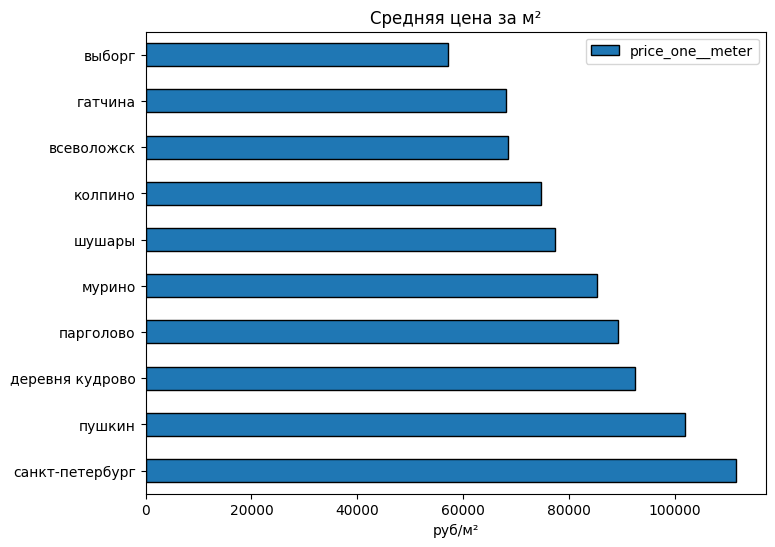

In [574]:
(top_10.sort_values(by='price_one__meter', ascending=False)
       .plot(title='Средняя цена за м²',
             xlabel='руб/м²',
             ylabel='',
             kind='barh', 
             legend=True,  
             ec='black', 
             figsize=(8, 6))
);

### Вывод: 
Из графика видно, что наибольшая средняя цена за 1 квадратный метр в Санкт-Петербурге(111705 руб.), что логично. Следом по стоимости идет Пушкин(101936 руб.), что тоже логично - много исторических мест, парков и расположен к городу ближе, чем, например, Гатчина и Выборг. Наименьшая цена за квадратный метр в Выборге(57117. руб.).

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [575]:
df_spb = df_update.query('locality_name == "санкт-петербург"')

In [576]:
df_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one__meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0
10,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,310.0,2.0,553.0,137.0,127525.25,3,11,2017,другой,14.0
15,16,4650000,39.0,2017-11-18,1,2.65,14.0,20.5,5,False,...,590.0,1.0,296.0,19.0,119230.77,5,11,2017,другой,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23596,8,3300000,31.0,2017-04-29,1,2.55,9.0,18.0,6,False,...,140.0,1.0,317.0,193.0,106451.61,5,4,2017,другой,12.0
23597,6,3200000,39.0,2017-12-16,1,2.65,9.0,20.0,6,False,...,NaN,0.0,NaN,38.0,82051.28,5,12,2017,другой,17.0
23598,19,9200000,101.0,2019-04-01,3,3.05,15.0,63.0,12,False,...,NaN,0.0,NaN,23.0,91089.11,0,4,2019,другой,14.0
23599,13,3550000,35.3,2018-02-28,1,2.86,15.0,16.3,4,False,...,353.0,2.0,652.0,29.0,100566.57,2,2,2018,другой,16.0


12354 Объявлений из Санкт-Петербурга. Определим центр с помощью стоимости квадратного метра. Построим график. Та точка, после которой пойдет явный спад в стоимости и будем считать за границы центра города.

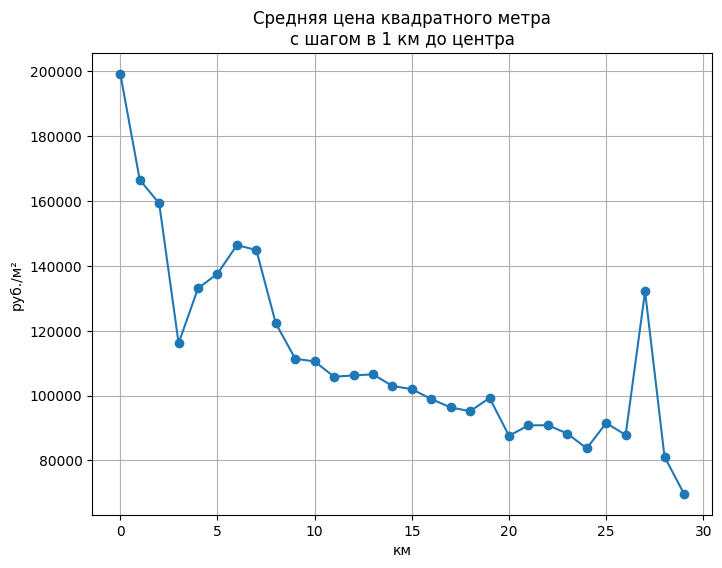

In [577]:
(df_spb.pivot_table(index='city_centers_nearest_km', values='price_one__meter')
    .plot(title='Средняя цена квадратного метра\nс шагом в 1 км до центра',
        xlabel='км',
        ylabel='руб./м²',
        marker='o', 
        grid=True, 
        figsize=(8, 6), 
        legend=False)
);

Из графика можно заметить, что после 8-го километра форма графика становится линейной и стоимость начинается уменьшаться. Максимальная стоимость в зоне у самого центра(до 1 км). Пик в районе 27 км - возможен из-за класса жилья - элитное

### Общий вывод


*Наибольшее влияние на стоимость квартиры оказывает её площадь.* Чем больше площадь квартиры, тем выше её стоимость. Также на стоимость квартиры влияет и количество комнат. Чем больше комнат, тем выше стоимость. На стоимость квартиры также влияет расстояние до центра города. Чем ближе квартира располагается к центру, тем выше ее стоимость. По результатам исследования приняли, что зона центра города распространяется на 8 км.

*Мы получили представление о типичном объекте недвижимости:* квартира с 1 или 2 комнатами, 5-ти или 9-ти этажка (с квартирой с 1 по 4 этаж), общей площадью около 45 м², площадью кухни около 5,5 м², с высотой потолков 2,6 м, стоимостью около 3.5 млн.руб, расположенной на удалении от центра на расстоянии 11-16 км, от аэропорта на расстоянии 15-25 км, до ближайшего парка около 500 метров.

Также установлено:

*Ожидаемое время продажи объекта недвижимости* - от 45 до 231 день.
*Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге* - 112 302 руб./м² (топ-10 населенных пунктов по количеству объявлений).
*Самая низкая средняя стоимость квадратного метра в Всеволожске* - 66 291 руб./м² (топ-10 населенных пунктов по количеству объявлений).